In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [96]:
def EuPut(S0,KKK,r,sigma,T,N):
    deltat=T/N
    uuu=np.exp(sigma * np.sqrt(deltat))
    ddd=1/uuu
    ppp=(np.exp(r * deltat) - ddd)/(uuu - ddd) #Risk neutral probability
    discount=np.exp(-r*deltat)
    S=np.zeros((N+1,N+1)) #Initialization
    V=S #Initialization
    for j in range(N+1):
        S[N,j]=S0*uuu**j*ddd**(N-j) 
        #V[N,j]=np.max([S[N,j]-KKK,0]) for call option
        V[N,j]=np.max([KKK-S[N,j],0]) #put option
    for i in range(N-1,-1,-1):
        for j in range(i+1):
            S[i,j]=S0*uuu**j*ddd**(i-j)
            V[i,j]=discount*(ppp*V[i+1,j+1]+(1-ppp)*V[i+1,j])
    return [ppp,V[0,0]]

In [97]:
def BS(S0,KKK,r,sigma,T):
    '''Black-Scholes Formula'''
    d1=(np.log(S0/KKK)+(r+0.5 * sigma ** 2)*T)/(sigma * np.sqrt(T)) 
    d2=d1-sigma * np.sqrt(T)
    PBS=KKK*np.exp(-r * T)*norm.cdf(-d2) - S0*norm.cdf(-d1) 
    return PBS

The prices when n=10, 100 and 1000 are [5.376351494943439, 5.553554112321353, 5.57152655383368]


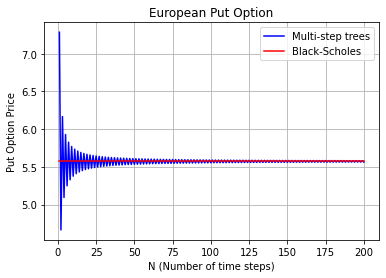

In [126]:
S0=100
KKK=100
r=.05
sigma=.2
T=1

prices0=[EuPut(S0,KKK,r,sigma,T,N)[1] for N in [10,100,1000]]
print('The prices when n=10, 100 and 1000 are',prices0)

Ns=list(range(1,201))
prices=[EuPut(S0,KKK,r,sigma,T,N)[1] for N in Ns]
BSprice=BS(S0,KKK,r,sigma,T)
BSprices=[BSprice for _ in Ns]
#plt.figure(figsize=(10,6))
plt.plot(Ns, prices, linestyle='-', color='b',label='Multi-step trees')
plt.plot(Ns, BSprices, linestyle='-', color='r', label='Black-Scholes')
plt.title('European Put Option')
plt.xlabel('N (Number of time steps)')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('fig1.svg', format='svg')

In [138]:
def AmPut(S0,KKK,r,sigma,T,N):
    deltat=T/N
    uuu=np.exp(sigma * np.sqrt(deltat))
    ddd=1/uuu
    ppp=(np.exp(r * deltat) - ddd)/(uuu - ddd) #Risk neutral probability
    discount=np.exp(-r*deltat)
    S=np.zeros((N+1,N+1)) #Initialization
    V=np.zeros((N+1,N+1)) #Initialization
    for j in range(N+1):
        S[N,j]=S0*uuu**j*ddd**(N-j) 
        #V[N,j]=np.max([S[N,j]-KKK,0]) for call option
        V[N,j]=np.max([KKK-S[N,j],0]) #put option
    for i in range(N-1,-1,-1):
        for j in range(i+1):
            S[i,j]=S0*uuu**j*ddd**(i-j)
            V[i,j]=discount*(ppp*V[i+1,j+1]+(1-ppp)*V[i+1,j])
            ex=np.max([KKK-S[i,j],0])
            V[i,j]=np.max([V[i,j],ex])
    return [ppp,V[0,0]]

The prices when n=10, 100 and 1000 are [6.0042590201829515, 6.082354409142444, 6.089595282977953]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


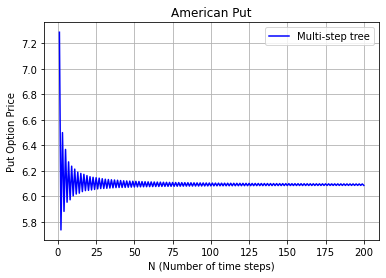

In [139]:
S0=100
KKK=100
r=.05
sigma=.2
T=1

prices0=[AmPut(S0,KKK,r,sigma,T,N)[1] for N in [10,100,1000]]
print('The prices when n=10, 100 and 1000 are',prices0)

Ns=list(range(1,201))
prices=[AmPut(S0,KKK,r,sigma,T,N)[1] for N in Ns]
plt.plot(Ns, prices, linestyle='-', color='b',label='Multi-step tree')
plt.title('American Put')
plt.xlabel('N (Number of time steps)')
plt.ylabel('Put Option Price')
plt.grid(True)
plt.legend()
plt.savefig('fig2.eps',format='eps')